## PART I: Draw a plot chart to see if there is a trend.


In [1]:
#PART I: Draw a plot chart to see if there is a trend. If there is, then performing differencing to detrend the data.

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

#Import data
prices=pd.read_csv("C:/Users/shubh/OneDrive/MyCloud/GIT/Time-Series-Analysis/ARIMA_Basics/PriceByDays.csv",parse_dates=True,index_col=0)

#Take a look at what's inside of the data
prices.head()

#Transform date index from string type to date type
prices.index = pd.DatetimeIndex(prices.index).to_period('D')

<AxesSubplot:xlabel='Day'>

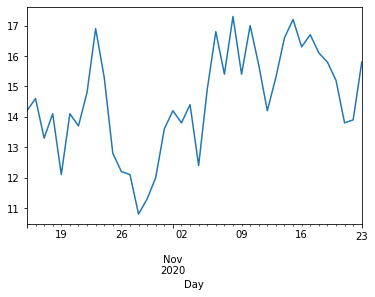

In [2]:
#Draw plot chart
prices["Sales"].plot()

In [ ]:
#No trend  or seasonality in the data so need of differencing.
#if there is a trend in original data then apply differncing then apply ACF and PACF
from statsmodels.tsa.statespace.tools import diff 
diffprices=diff(prices, k_diff=1, k_seasonal_diff=None, seasonal_periods=1)

## Part II: Draw ACF and PACF Plot Charts to identify the order of the model

C:\Users\shubh\miniconda3\envs\timeseries\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


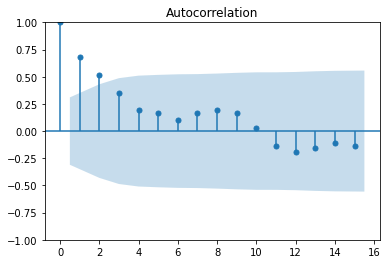

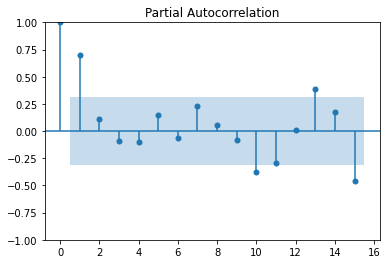

In [3]:
#Part II: Draw ACF and PACF Plot Charts to identify the order of AR or MA or ARMA model
sm.graphics.tsa.plot_acf(prices.values.squeeze(), lags=15) # You can change the lags value if we want to see more lags
sm.graphics.tsa.plot_pacf(prices.values.squeeze(), lags=15)
plt.show()

## Part III Run analysis model

In [4]:
#Part III Run analysis model
#According to the ACF and PACF chart, we identify AR(1) model. 

mod = sm.tsa.ARIMA(prices, order=(1, 0, 0))
res = mod.fit()
print(res.summary())
#As we can see in the result, p-value for the coefficient of ar.L1 is significant. 
#The Lung-Box test is not significant, meaning that the population error is zero. So, AR1 is a good model.
#If you run MA(1), change order parameter to order(0,0,1)
#If you run AR(1) after one lag differencing, change order parameter to order(1,1,0)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   40
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -65.420
Date:                Sun, 10 Jul 2022   AIC                            136.840
Time:                        13:49:50   BIC                            141.907
Sample:                    10-15-2020   HQIC                           138.672
                         - 11-23-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.5947      0.603     24.197      0.000      13.413      15.777
ar.L1          0.6754      0.144      4.674      0.000       0.392       0.959
sigma2         1.5188      0.456      3.334      0.0

In [5]:
#Part IV: Forecasting
#If we need to write the AR equation, you can use the analysis result above. The equestion should be
#Xsub(t) - 14.59= 0.68*(Xsub(t-1) - 14.59)+epsilon(t)
#Of course, Python can help us to forecast values even if you don't write the equation above.

#If forecast one day ahead
print(res.forecast(1))

#If forecast two days ahead
print(res.forecast(2))

2020-11-24    15.408698
Freq: D, dtype: float64
2020-11-24    15.408698
2020-11-25    15.144428
Freq: D, Name: predicted_mean, dtype: float64
